In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import  sqrt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/Demo Datasets/Lesson 4/Advertising.csv',index_col = 0)


In [3]:
df.head()
df.columns = ['TV','radio','newspaper','sales']

In [4]:
df.shape

(200, 4)

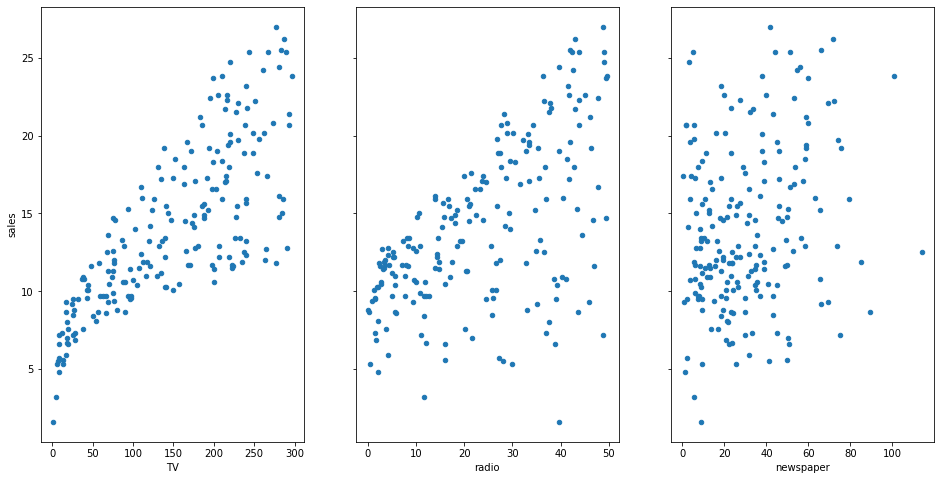

In [5]:
fig,axis = plt.subplots(1,3,sharey = True)
df.plot(kind = 'scatter', x = 'TV' ,y = 'sales', ax = axis[0], figsize = (16,8))
df.plot(kind = 'scatter' , x= 'radio' ,y = 'sales' , ax = axis[1])
df.plot(kind = "scatter", x = 'newspaper' ,y = 'sales', ax = axis[2])



In [6]:
independent = ['TV']
x = df[independent]

In [7]:

y = df.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [8]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [9]:
X_new = pd.DataFrame({'TV' : [50]})

In [10]:
X_new.head()

,TV
0,50


In [11]:
lm.predict(X_new)

array([9.40942557])

In [12]:
X_new = pd.DataFrame({'TV' : [df.TV.min(),df.TV.max()]})

In [13]:
preds = lm.predict(X_new)

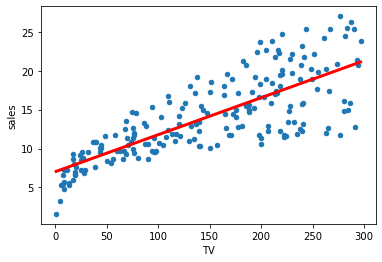

In [14]:
df.plot(kind = 'scatter' , x = 'TV' , y = 'sales')
plt.plot(X_new,preds,c = 'red' ,linewidth = 3)

In [15]:
import statsmodels.formula.api as smf

In [16]:
lm = smf.ols(formula = 'sales~TV',data = df).fit()

In [17]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [18]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [19]:
lm.rsquared

0.611875050850071

In [20]:
feature_cols = ['TV', 'radio' ,'newspaper']
X = df[feature_cols]
y = df.sales

from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size = 0.3,random_state = 42)

In [21]:
lm = LinearRegression()

lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,predictions))) 

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]
1.8159758162002486


In [23]:
lm = smf.ols(formula= 'sales ~ TV+radio + newspaper',data= df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        23:03:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
import numpy as np
np.random.seed(12345)

nums = np.random.rand(len(df))
extra  = nums>0.5

df['Size'] = 'small'
df.loc[extra,'Size'] = 'large'
df.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [30]:
df['IsLarge'] = df.Size.map({'small' : '0' , 'large' : '1'})


In [31]:
df.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [34]:
feature_cols = ['TV','radio','newspaper','sales','IsLarge']
y = df.sales
x = df[feature_cols]

lm = LinearRegression()
lm.fit(x,y)

zip(feature_cols,lm.coef_)

In [37]:
np.random.seed(123456)

nums = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums< 0.66)
mask_urban = nums > 0.66
df['Area'] = 'rural'
df.loc[mask_suburban,'Area'] = 'suburban'
df.loc[mask_urban,'Area'] ='urban'
df.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [40]:
area_dummies = pd.get_dummies(df.Area,prefix = 'Area').iloc[:,1:]

df = pd.concat([df,area_dummies],axis =1)
df.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [43]:
feature_cols = ['TV', 'radio' , 'newspaper','IsLarge', 'Area_suburban','Area_urban']
x = df[feature_cols]
y = df.sales

lm = LinearRegression()
lm.fit(x,y)
print(feature_cols,lm.coef_)

['TV', 'radio', 'newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
